<a href="https://colab.research.google.com/github/cristinapopescu19/Projects/blob/An-num/Probleme%20mecanica%20rezolvare%20numerica_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#pb 1 a
from sympy import *

# definim variabila simbolică t
t = symbols('t')

# definim funcția x(t)
x = t**3 - 5*t**2 + 3*t + 4

# calculăm derivata funcției x(t)
x_prime = diff(x, t)

# găsim rădăcinile derivatei
roots = solve(x_prime, t)

# selectăm rădăcina pozitivă
t_min = max([r for r in roots if r > 0])

# calculăm distanța de la origine până la punctul de minim
d_min = x.subs(t, t_min)

print(f"Distanța de la origine de la care punctul începe să se miste este {d_min}")

Distanța de la origine de la care punctul începe să se miste este -5


In [ ]:
#pb 1 b
from sympy import *

# definim variabila simbolică t
t = symbols('t')

# definim funcția x(t)
x = t**3 - 5*t**2 + 3*t + 4

# a) determinăm distanța de la origine de la care punctul începe să se miste

# calculăm derivata funcției x(t)
x_prime = diff(x, t)

# găsim rădăcinile derivatei
roots = solve(x_prime, t)

# selectăm rădăcina pozitivă
t_min = max([r for r in roots if r > 0])

# calculăm distanța de la origine până la punctul de minim
d_min = x.subs(t, t_min)

print(f"Distanța de la origine de la care punctul începe să se miste este {d_min}")

# b) determinăm când punctul se mișcă în sensul pozitiv/negativ al axei Ox

# găsim rădăcinile funcției x(t)
t_roots = solve(x, t)

# construim lista de intervale
intervals = [(0, t_roots[0])]
for i in range(len(t_roots)-1):
    intervals.append((t_roots[i], t_roots[i+1]))
intervals.append((t_roots[-1], oo))

# evaluăm semnul funcției pe fiecare subinterval
signs = [sign(x.subs(t, interval[0])) for interval in intervals]

# afișăm pozițiile punctului și timpii parcurși în momentele de oprire
for i in range(len(intervals)):
    if signs[i] == 0:
        print(f"Punctul se află în punctul (0, {x.subs(t, intervals[i][0])}) la momentul {intervals[i][0]}")
    elif signs[i] > 0:
        print(f"Punctul se mișcă în sensul pozitiv al axei Ox în intervalul [{intervals[i][0]}, {intervals[i][1]}], parcurgând distanța {x.subs(t, intervals[i][1]) - x.subs(t, intervals[i][0])} în timpul {intervals[i][1]} - {intervals[i][0]}")
    else:
        print(f"Punctul se mișcă în sensul negativ al axei Ox în intervalul [{intervals[i][0]}, {intervals[i][1]}], parcurgând distanța {x.subs(t, intervals[i][1]) - x.subs(t, intervals[i][0])} în timpul {intervals[i][1]} - {intervals[i][0]}")

Distanța de la origine de la care punctul începe să se miste este -5
Punctul se mișcă în sensul pozitiv al axei Ox în intervalul [0, 4], parcurgând distanța -4 în timpul 4 - 0
Punctul se află în punctul (0, 0) la momentul 4
Punctul se află în punctul (0, -3*sqrt(5)/2 - 5*(1/2 - sqrt(5)/2)**2 + (1/2 - sqrt(5)/2)**3 + 11/2) la momentul 1/2 - sqrt(5)/2
Punctul se află în punctul (0, -5*(1/2 + sqrt(5)/2)**2 + 3*sqrt(5)/2 + (1/2 + sqrt(5)/2)**3 + 11/2) la momentul 1/2 + sqrt(5)/2


In [ ]:
#pb 1 c
from sympy import *

# definim variabila simbolică t
t = symbols('t')

# definim funcția x(t)
x = t**3 - 5*t**2 + 3*t + 4

# găsim derivata de ordinul doi a funcției x(t)
x_double_prime = diff(x, t, 2)

# calculăm rădăcinile derivatei de ordinul doi
roots = solve(x_double_prime, t)

# construim lista de intervale
intervals = [(0, roots[0])]
for i in range(len(roots)-1):
    intervals.append((roots[i], roots[i+1]))
intervals.append((roots[-1], oo))

# evaluăm semnul derivatei de ordinul doi pe fiecare subinterval
signs = [sign(x_double_prime.subs(t, interval[0])) for interval in intervals]

# afișăm momentele când mișcarea este accelerată și când este întârziată
for i in range(len(intervals)):
    if signs[i] > 0:
        print(f"Mișcarea este accelerată în intervalul [{intervals[i][0]}, {intervals[i][1]}]")
    elif signs[i] < 0:
        print(f"Mișcarea este întârziată în intervalul [{intervals[i][0]}, {intervals[i][1]}]")
    else:
        print(f"Mișcarea este uniform accelerată/întârziată în intervalul [{intervals[i][0]}, {intervals[i][1]}]")

Mișcarea este întârziată în intervalul [0, 5/3]
Mișcarea este uniform accelerată/întârziată în intervalul [5/3, oo]


TypeError: ignored

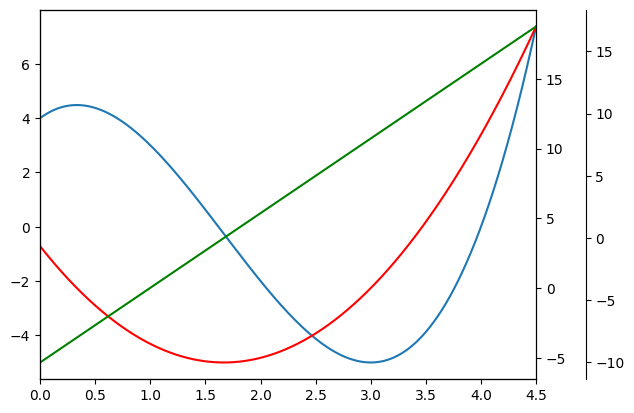

In [ ]:
#pb 1 d
import matplotlib.pyplot as plt
from sympy import *
import numpy as np
# definim variabila simbolică t
t = symbols('t')

# definim funcția x(t)
x = t**3 - 5*t**2 + 3*t + 4

# calculăm derivata și derivata de ordinul doi a funcției x(t)
x_prime = diff(x, t)
x_double_prime = diff(x, t, 2)

# definim funcțiile simbolice v(t) și a(t)
v = lambdify(t, x_prime, 'numpy')
a = lambdify(t, x_double_prime, 'numpy')

# definim intervalul de timp [0, 4.5] și numărul de puncte pe care vrem să le afișăm
t_min = 0
t_max = 4.5
num_points = 1000
t_values = np.linspace(t_min, t_max, num_points)

# calculăm poziția, viteza și accelerația punctului pentru fiecare moment de timp
x_values = np.array([x.subs(t, t_val) for t_val in t_values])
v_values = v(t_values)
a_values = a(t_values)
# afișăm graficul mișcării punctului
fig, ax = plt.subplots()
ax.plot(t_values, x_values, label='Poziție')

# adăugăm graficele pentru viteza și accelerația punctului
ax2 = ax.twinx()
ax2.plot(t_values, v_values, 'r', label='Viteza')
ax3 = ax.twinx()
ax3.plot(t_values, a_values, 'g', label='Acceleratia')
ax3.spines['right'].set_position(('axes', 1.1))

# setăm limitele axelor
ax.set_xlim([t_min, t_max])
ax.set_ylim([0, max(x_values)*1.1])
ax2.set_ylim([min(v_values)*1.1, max(v_values)*1.1])
ax3.set_ylim([min(a_values)*1.1, max(a_values)*1.1])

# etichetăm axele și graficele
ax.set_xlabel('Timp')
ax.set_ylabel('Poziție')
ax2.set_ylabel('Viteza')
ax3.set_ylabel('Acceleratia')
ax.legend(loc='upper left')
ax2.legend(loc='upper right')
ax3.legend(loc='lower right')

# afișăm graficul în timp real
plt.show(block=False)

# actualizăm valorile graficului la fiecare 50ms
for i in range(num_points):
    ax.lines[0].set_ydata(x_values[:i])
    ax2.lines[0].set_ydata(v_values[:i])
    ax3.lines[0].set_ydata(a_values[:i])

    # excluzi valorile necorespunzatoare
    ax.set_ylim([0, max(x_values[:i])*1.1])
    ax2.set_ylim([min(v_values[:i])*1.1, max(v_values[:i])*1.1])
    ax3.set_ylim([min(a_values[:i])*1.1, max(a_values[:i])*1.1])

    plt.draw()
    plt.pause(0.05)


# închidem fereastra graficului
plt.close()

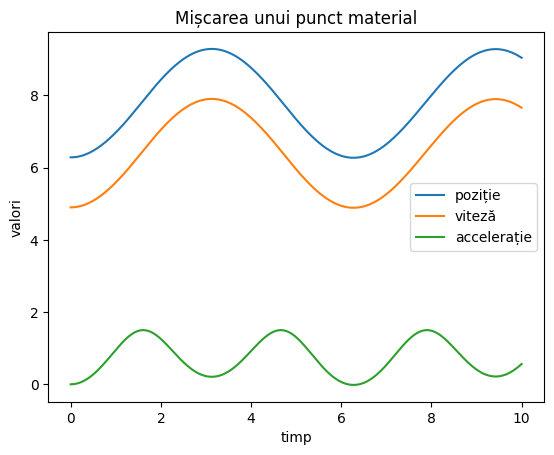

In [ ]:
#pb 2
import numpy as np
import matplotlib.pyplot as plt

# definim constantele fizice
a = 2
k = 3

# definim condițiile inițiale
x0 = a * np.pi
v0 = 2 * np.sqrt(a * k)

# definim funcția de accelerație
def accel(x, t):
    return (k/a) * np.sin(x)

# definim funcția de derivată a poziției
def deriv(x, t):
    return v

# definim funcția de derivată a vitezei
def deriv2(x, t):
    return accel(x, t)

# definim intervalul de timp
t = np.linspace(0, 10, 1000)

# rezolvăm ecuația diferențială folosind solve_ivp
from scipy.integrate import solve_ivp

sol = solve_ivp(deriv2, [0, 10], [x0, v0], t_eval=t)

# extragem valorile pentru poziție, viteză și accelerație
x_values = sol.y[0]
v_values = sol.y[1]
a_values = accel(x_values, t)

# afișăm rezultatele pe un grafic
fig, ax = plt.subplots()
ax.plot(t, x_values, label='poziție')
ax.plot(t, v_values, label='viteză')
ax.plot(t, a_values, label='accelerație')
ax.legend()
ax.set_xlabel('timp')
ax.set_ylabel('valori')
ax.set_title('Mișcarea unui punct material')
plt.show()

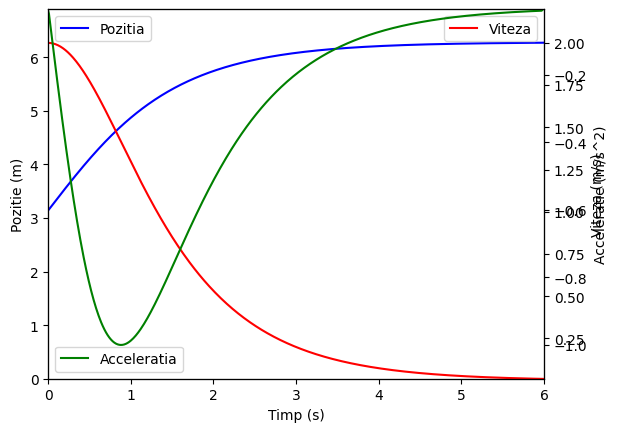

In [ ]:
#pb 2 b
import numpy as np
import matplotlib.pyplot as plt

# definim constantele fizice
a = 1
k = 1

# definim functia x(t)
def x(t):
    return 4*a*np.arctan(np.exp(np.sqrt(k/a)*t))

# definim intervalul de timp
t_min = 0
t_max = 6
dt = 0.01
t = np.arange(t_min, t_max, dt)

# calculam pozitiile, vitezele si acceleratiile
x_values = x(t)
v_values = np.gradient(x_values, dt)
a_values = np.gradient(v_values, dt)

# cream figura si axele
fig, ax = plt.subplots()
ax2 = ax.twinx()
ax3 = ax.twinx()

# desenam pozitiile, vitezele si acceleratiile in functie de timp
ax.plot(t, x_values, label='Pozitia', color='blue')
ax2.plot(t, v_values, label='Viteza', color='red')
ax3.plot(t, a_values, label='Acceleratia', color='green')

# setam etichetele axelor si legendele
ax.set_xlabel('Timp (s)')
ax.set_ylabel('Pozitie (m)')
ax2.set_ylabel('Viteza (m/s)')
ax3.set_ylabel('Acceleratie (m/s^2)')
ax.legend(loc='upper left')
ax2.legend(loc='upper right')
ax3.legend(loc='lower left')

# setam limitele axelor
ax.set_xlim([t_min, t_max])
ax.set_ylim([0, x(t_max)*1.1])
ax2.set_ylim([min(v_values)*1.1, max(v_values)*1.1])
ax3.set_ylim([min(a_values)*1.1, max(a_values)*1.1])

# afisam graficul
plt.show()

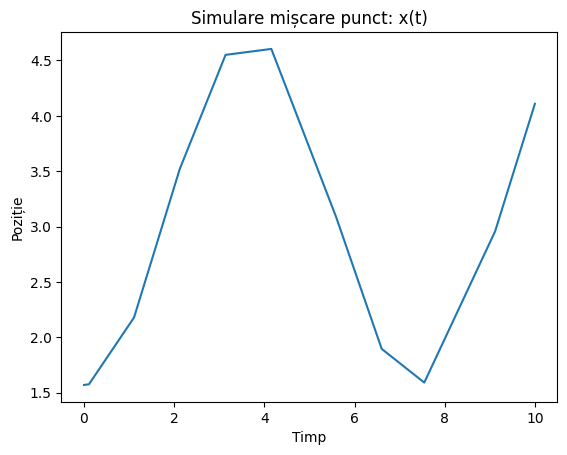

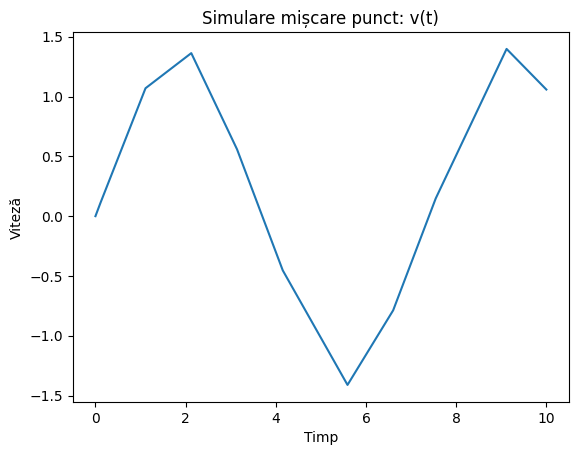

In [ ]:
#pb 2 c
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Definim funcția care descrie ecuația diferențială
def f(t, y, k, a):
    x, v = y
    return [v, k * np.sin(x) / a]

# Setăm valorile constante pentru k și a
k = 1
a = 1

# Setăm valorile inițiale pentru x și v
x0 = np.pi / 2
v0 = 0

# Definim intervalul de timp pe care vrem să simulăm mișcarea
t_span = [0, 10]

# Definim valorile inițiale pentru x și v
y0 = [x0, v0]

# Aplicăm funcția solve_ivp pentru a rezolva problema de valoare inițială
solution = solve_ivp(f, t_span, y0, args=(k, a))

# Extragem soluția pentru x și v din obiectul soluție returnat de solve_ivp
x_values = solution.y[0]
v_values = solution.y[1]

# Afisăm graficul poziției x în funcție de timp
plt.plot(solution.t, x_values)
plt.xlabel('Timp')
plt.ylabel('Poziție')
plt.title('Simulare mișcare punct: x(t)')
plt.show()

# Afisăm graficul vitezei v în funcție de timp
plt.plot(solution.t, v_values)
plt.xlabel('Timp')
plt.ylabel('Viteză')
plt.title('Simulare mișcare punct: v(t)')
plt.show()

Timpul de intalnire: 3.48 secunde
Locul de intalnire: 17.42 metri


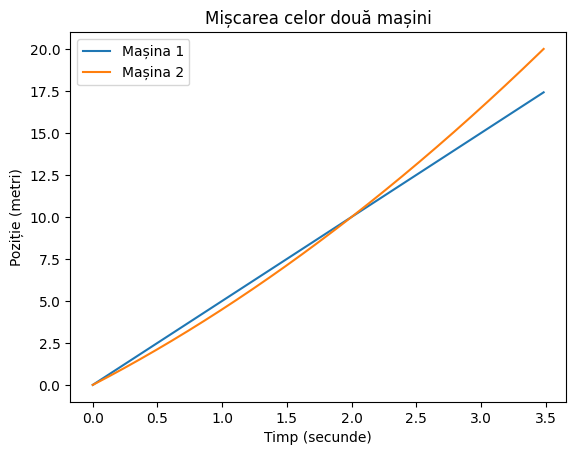

In [ ]:
#pb 3
import numpy as np
import matplotlib.pyplot as plt

# Datele problemei
d = 20 # distanța inițială
V1 = 5 # viteza primei mașini
v2 = 4 # viteza inițială a celei de-a doua mașini
a = 1 # accelerația celei de-a doua mașini

# Găsirea timpului de întâlnire
t1 = (-v2 + np.sqrt(v2**2 + 2*a*d))/a

# Afisare rezultate
print(f"Timpul de intalnire: {t1:.2f} secunde")
print(f"Locul de intalnire: {V1*t1:.2f} metri")

# Definirea intervalului de timp și calculul pozițiilor mașinilor în acel interval
t = np.linspace(0, t1, 1000)
x1 = V1 * t
x2 = v2 * t + (1/2) * a * t**2

# Afisarea graficului mișcării celor două mașini
plt.plot(t, x1, label="Mașina 1")
plt.plot(t, x2, label="Mașina 2")
plt.xlabel("Timp (secunde)")
plt.ylabel("Poziție (metri)")
plt.title("Mișcarea celor două mașini")
plt.legend()
plt.show()

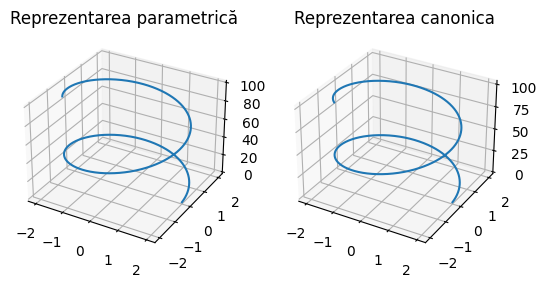

In [ ]:
#pb 4 a, b
import sympy as sp

t = sp.symbols('t')
x = 2 * sp.cos(t)
y = 2 * sp.sin(t)
z = 10 * t

r = sp.Matrix([x, y, z])
dr = r.diff(t)

T = dr / sp.sqrt(dr.dot(dr))
N = T.diff(t) / sp.sqrt((T.diff(t)).dot(T.diff(t)))
B = T.cross(N)

F = sp.Matrix([r.dot(T), r.dot(N), r.dot(B)])
s = sp.integrate(sp.sqrt(dr.dot(dr)), (t, 0, t))
F = F.subs(t, s)
import numpy as np
import matplotlib.pyplot as plt

# reprezentarea parametrică
t_vals = np.linspace(0, 10, 1000)
x_vals = 2 * np.cos(t_vals)
y_vals = 2 * np.sin(t_vals)
z_vals = 10 * t_vals

fig = plt.figure()
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot(x_vals, y_vals, z_vals)
ax.set_title('Reprezentarea parametrică')

# reprezentarea canonica
u_vals = np.linspace(float(s.subs(t, 0)), float(s.subs(t, 10)), 1000)
x_vals = 2 * np.cos(u_vals / 10)
y_vals = 2 * np.sin(u_vals / 10)
z_vals = u_vals

ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.plot(x_vals, y_vals, z_vals)
ax.set_title('Reprezentarea canonica')
plt.show()

In [ ]:
#pb 4 c
import sympy as sp

# definim variabilele simbolice
u = sp.symbols('u')

# definim parametrizarea curbei C
x = 2*sp.cos(u)
y = 2*sp.sin(u)
z = 10*u

# calculam vectorul r(u)
r = sp.Matrix([x, y, z])

# calculam derivata r'(u)
r_diff = r.diff(u)

# calculam norma Euclidiana a vectorului r'(u)
r_diff_norm = sp.sqrt(r_diff.dot(r_diff))

# calculam vectorul T(u)
T = r_diff / r_diff_norm

# calculam derivata lui T(u)
T_diff = T.diff(u)

# calculam norma Euclidiana a vectorului T'(u)
T_diff_norm = sp.sqrt(T_diff.dot(T_diff))

# calculam vectorul V(u)
V = T_diff / T_diff_norm

# calculam produsul vectorial T(u) x V(u)
B = T.cross(V)

# afisam formulele
print("T(u) = ", T)
print("V(u) = ", V)
print("B(u) = ", B)

T(u) =  Matrix([[-2*sin(u)/sqrt(4*sin(u)**2 + 4*cos(u)**2 + 100)], [2*cos(u)/sqrt(4*sin(u)**2 + 4*cos(u)**2 + 100)], [10/sqrt(4*sin(u)**2 + 4*cos(u)**2 + 100)]])
V(u) =  Matrix([[-2*cos(u)/(sqrt(4*sin(u)**2/(4*sin(u)**2 + 4*cos(u)**2 + 100) + 4*cos(u)**2/(4*sin(u)**2 + 4*cos(u)**2 + 100))*sqrt(4*sin(u)**2 + 4*cos(u)**2 + 100))], [-2*sin(u)/(sqrt(4*sin(u)**2/(4*sin(u)**2 + 4*cos(u)**2 + 100) + 4*cos(u)**2/(4*sin(u)**2 + 4*cos(u)**2 + 100))*sqrt(4*sin(u)**2 + 4*cos(u)**2 + 100))], [0]])
B(u) =  Matrix([[20*sin(u)/(sqrt(4*sin(u)**2/(4*sin(u)**2 + 4*cos(u)**2 + 100) + 4*cos(u)**2/(4*sin(u)**2 + 4*cos(u)**2 + 100))*(4*sin(u)**2 + 4*cos(u)**2 + 100))], [-20*cos(u)/(sqrt(4*sin(u)**2/(4*sin(u)**2 + 4*cos(u)**2 + 100) + 4*cos(u)**2/(4*sin(u)**2 + 4*cos(u)**2 + 100))*(4*sin(u)**2 + 4*cos(u)**2 + 100))], [4*sin(u)**2/(sqrt(4*sin(u)**2/(4*sin(u)**2 + 4*cos(u)**2 + 100) + 4*cos(u)**2/(4*sin(u)**2 + 4*cos(u)**2 + 100))*(4*sin(u)**2 + 4*cos(u)**2 + 100)) + 4*cos(u)**2/(sqrt(4*sin(u)**2/(4*sin(u)**2 +

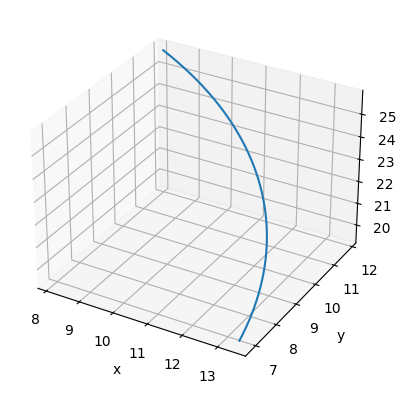

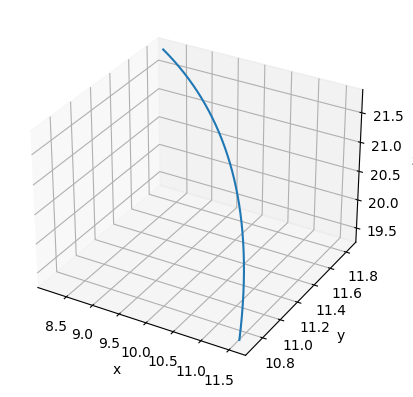

In [ ]:
#pb 5
import numpy as np
import matplotlib.pyplot as plt

# definim parametrii a, b, c, x0, y0, z0
a = 5.1123
b = 4.9608
c = 4.1254
x0 = 8.2789
y0 = 6.8809
z0 = 19.2986

# definim intervalul de valori pentru t
t = np.linspace(0, 1.6, 1000)

# calculam coordonatele punctelor de pe curba C
x = x0 + a * np.cos(t)
y = y0 + b * np.sin(t)
z = z0 + c * t

# reprezentam grafic curba C
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

import numpy as np
import matplotlib.pyplot as plt

# definim parametrii a, b, c, x0, y0, z0
a = 5.1123
b = 4.9608
c = 4.1254
x0 = 8.2789
y0 = 6.8809
z0 = 19.2986

# definim intervalul de valori pentru u
u = np.linspace(0, 5.061, 1000)

# calculam coordonatele punctelor de pe curba C utilizand parametrizarea canonică
x = x0 + a * np.cos(np.arctan(b/c) + u / np.sqrt(a**2 + b**2))
y = y0 + b * np.sin(np.arctan(b/c) + u / np.sqrt(a**2 + b**2))
z = z0 + c * u / np.sqrt(a**2 + b**2 + c**2)

# reprezentam grafic curba C
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()


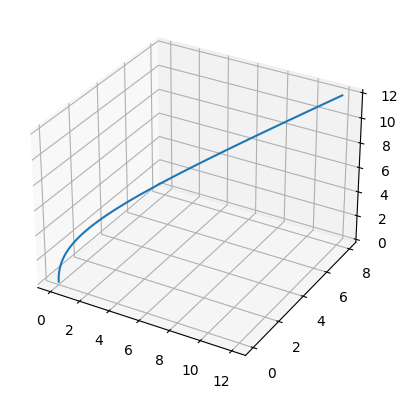

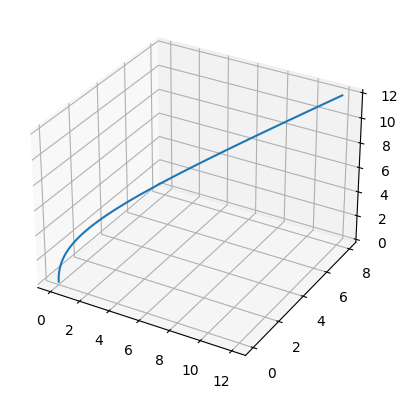

<ipython-input-9-1365cbec5dc1>:70: RuntimeWarning: divide by zero encountered in double_scalars
  return 1/torsion(t)


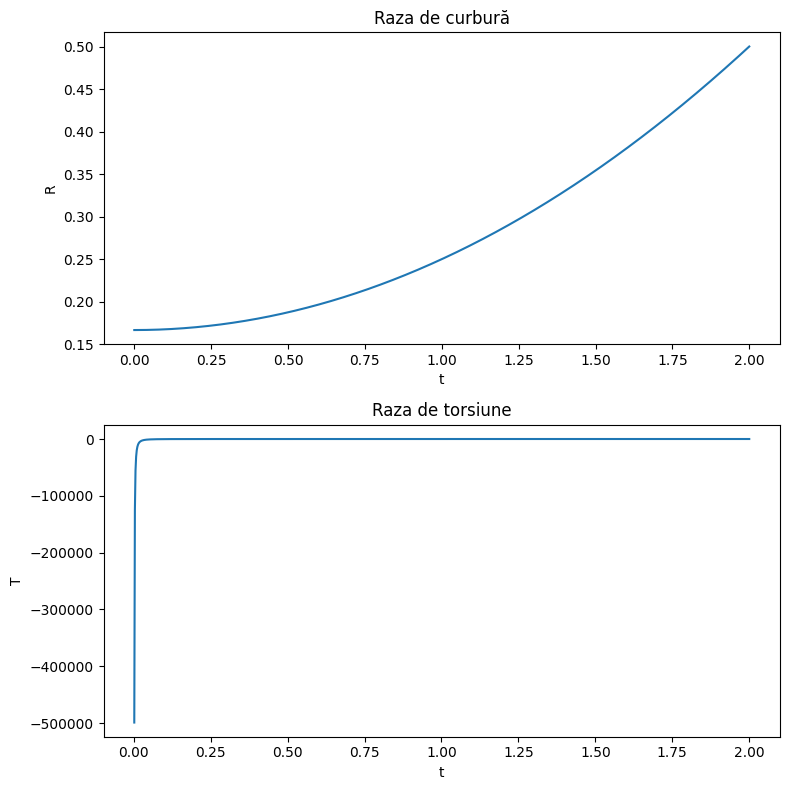

In [ ]:
#pb 6
import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(0, 2, 100)  # Intervalul de valori t
x = 3 * t ** 2
y = t ** 3
z = 6 * t
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z)
plt.show()
vx = 6 * t
vy = 3 * t ** 2
vz = 6 * np.ones_like(t)
v = np.sqrt(vx ** 2 + vy ** 2 + vz ** 2)  # Modulul vitezei
t_9 = t[np.where(v == 9)]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z)
ax.scatter(3 * t_9 ** 2, t_9 ** 3, 6 * t_9, c='r')
plt.show()
import numpy as np
import matplotlib.pyplot as plt

# functia de calcul a curburii
def curvature(t):
    x = 3 * t**2
    y = t**3
    z = 6 * t

    dx = 6 * t
    dy = 3 * t**2
    dz = 6

    ddx = 6
    ddy = 6 * t
    ddz = 0

    num = abs(dx*ddy - dy*ddx)**2 + abs(dy*ddz - dz*ddy)**2 + abs(dz*ddx - dx*ddz)**2
    den = (dx**2 + dy**2 + dz**2)**(3/2)

    return num/den

# functia de calcul a razei de curbură
def radius_of_curvature(t):
    return 1/curvature(t)

# functia de calcul a torsiunii
def torsion(t):
    x = 3 * t**2
    y = t**3
    z = 6 * t

    dx = 6 * t
    dy = 3 * t**2
    dz = 6

    ddx = 6
    ddy = 6 * t
    ddz = 0

    num = dx*(ddy*ddz - ddz*dy) + dy*(ddz*ddx - ddx*ddz) + dz*(ddx*dy - ddy*dx)
    den = (dx**2 + dy**2 + dz**2)**(3/2)

    return num/den

# functia de calcul a razei de torsiune
def radius_of_torsion(t):
    return 1/torsion(t)

# generam un set de valori pentru t
t_vals = np.linspace(0, 2, 1000)

# calculam valorile razei de curbură și razei de torsiune pentru fiecare t
curvature_vals = [curvature(t) for t in t_vals]
radius_of_curvature_vals = [radius_of_curvature(t) for t in t_vals]
torsion_vals = [torsion(t) for t in t_vals]
radius_of_torsion_vals = [radius_of_torsion(t) for t in t_vals]

# traseaza graficele
fig, axs = plt.subplots(2, figsize=(8, 8))

axs[0].plot(t_vals, radius_of_curvature_vals)
axs[0].set_title("Raza de curbură")
axs[0].set_xlabel("t")
axs[0].set_ylabel("R")

axs[1].plot(t_vals, radius_of_torsion_vals)
axs[1].set_title("Raza de torsiune")
axs[1].set_xlabel("t")
axs[1].set_ylabel("T")

plt.tight_layout()
plt.show()
